# Task 2 : Data insights

### **Libraries**

In [96]:
# Data analysis and wragling
import xlrd
import pandas as pd
import numpy as np
import datetime as dt

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt 

# Statistics
from statistics import stdev
from scipy.stats import t

# Dates
import matplotlib.dates as mdates

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


## **1. Exploring 'Customer Demographic' Dataset**

In [ ]:
customer_demographic = pd.read_excel(r"C:\Users\andre\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "CustomerDemographic", header=1)

In [104]:
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
4,5,Female,56,1977-05-13,NaN,Affluent Customer,1,8.0


In [105]:
customer_demographic.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure'],
      dtype='object')

In [114]:
customer_demographic = customer_demographics.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
customer_demographic['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
customer_demographic['gender'].replace('M', 'Male', inplace=True)
customer_demographic['gender'].replace('U', 'Unknown', inplace=True)
customer_demographic['deceased_indicator'].replace(['N'], 0, inplace=True)
customer_demographic['deceased_indicator'].replace(['Y'], 1, inplace=True)
customer_demographic['owns_car'].replace('Yes', 1, inplace=True)
customer_demographic['owns_car'].replace('No', 0, inplace=True)
customer_demographic = customer_demographic[customer_demographic['DOB'] != customer_demographic.DOB.min()]
customer_demographic[customer_demographic['deceased_indicator'] == 0]
customer_demographic = customer_demographic.drop(['deceased_indicator'], axis=1)
customerdemographic_clean = customer_demographic.dropna()
customerdemographic_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [115]:
customerdemographic_clean['age'] = (dt.datetime.now() - customerdemographic_clean['DOB']) / np.timedelta64(1, 'Y')
customerdemographic_clean['age_class'] = ((round(customerdemographic_clean['age'] / 10)) * 10).astype(int)
customerdemographic_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.596757,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.417554,40
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,68.322966,70
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.621234,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.668360,60


# **2. Exploring 'Customer Address' Dataset**

In [ ]:
customer_address = pd.read_excel(r"C:\Users\andre\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "CustomerAddress", header=1)

In [109]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [110]:
customer_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [116]:
customer_address['state'].replace('New South Wales', 'NSW', inplace=True)
customer_address['state'].replace('Victoria', 'VIC', inplace=True)
customeraddress_clean = customer_address.dropna()
customeraddress_clean.head(20)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,NSW,Australia,9
6,8,49 Londonderry Lane,2650,NSW,Australia,4
7,9,97736 7th Trail,2023,NSW,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [119]:
new_customer_address = pd.merge(customerdemographic_clean, customeraddress_clean, left_index=True, right_index=True)
new_customer_address= new_customer_address.dropna()
new_customer_address.head()

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.596757,70,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.417554,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,68.322966,70,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.621234,60,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.668360,60,7,4 Delaware Trail,2210,NSW,Australia,9


# **2. Exploring 'Transactions' Dataset**

In [ ]:
txns_df = pd.read_excel(r"C:\Users\andre\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='Transactions')
txns_df = txns_df.sort_values('customer_id')

In [131]:
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [132]:
txns_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [133]:
txns_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [134]:
txns_df.duplicated().sum()

0

In [135]:
txns_df.shape

(20000, 13)

In [136]:
txns_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
txns_df['product_first_sold_date'] = pd.TimedeltaIndex(txns_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [138]:
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [139]:
txns_df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [140]:
txnsdf_clean = txns_df.dropna()
txnsdf_clean.shape

(19445, 13)

In [141]:
txnsdf_clean['transaction_date'].describe()

count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [142]:
most_recent_purchase = txnsdf_clean['transaction_date'].max()
txnsdf_clean['last_purchase_days_ago'] = most_recent_purchase - txnsdf_clean['transaction_date']
txnsdf_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txnsdf_clean['profit'] = txnsdf_clean['list_price'] - txnsdf_clean['standard_cost']
txnsdf_clean.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [143]:
txnsdf_clean[txnsdf_clean['last_purchase_days_ago'] > 365].shape

(0, 15)

In [145]:
rfmTable = txnsdf_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [146]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [147]:
rfmTable.shape

(3492, 3)

In [148]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [149]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [150]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [151]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [152]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [153]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


### **Customer Address vs. Transactions**

In [154]:
addr_new_txns = pd.merge(rfmSeg, new_customer_address, left_index=True, right_index=True)
addr_new_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [155]:
addr_new_txns.shape

(2853, 25)

<AxesSubplot:xlabel='r_score'>

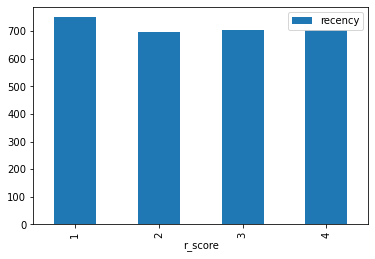

In [156]:
addr_new_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

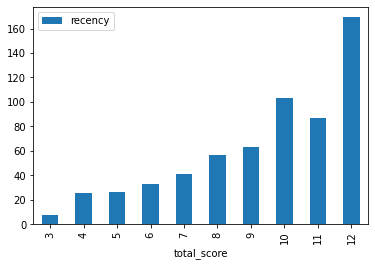

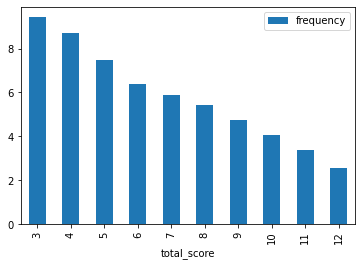

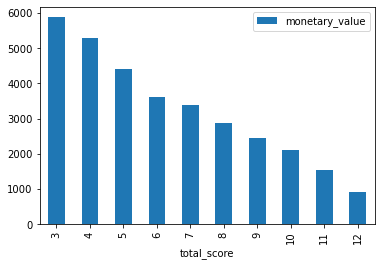

In [157]:
addr_new_txns.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
addr_new_txns.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
addr_new_txns.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

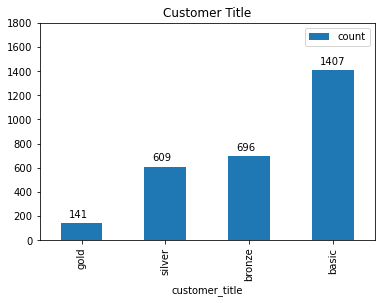

In [159]:
customer_titles_df = addr_new_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

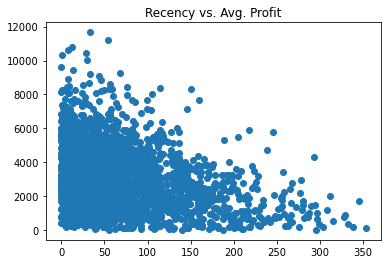

In [161]:
plt.scatter(addr_new_txns['recency'], addr_new_txns['monetary_value'])
plt.title('Recency vs. Avg. Profit')
plt.show()

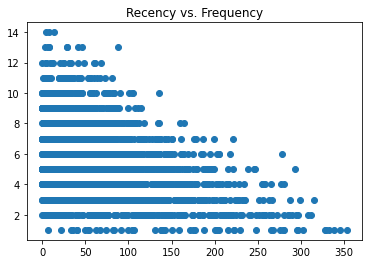

In [163]:
plt.scatter(addr_new_txns['recency'], addr_new_txns['frequency'])
plt.title('Recency vs. Frequency')
plt.show()

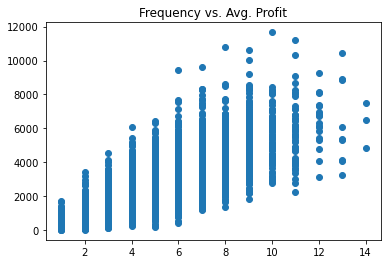

In [166]:
plt.scatter(addr_new_txns['frequency'], addr_new_txns['monetary_value'])
plt.title('Frequency vs. Avg. Profit')
plt.show()

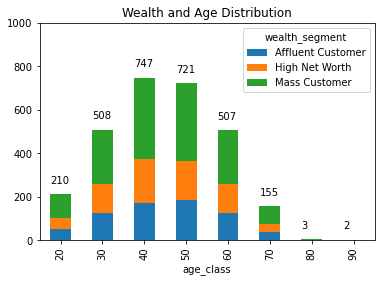

In [169]:
addr_new_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_new_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth and Age Distribution')
plt.show()

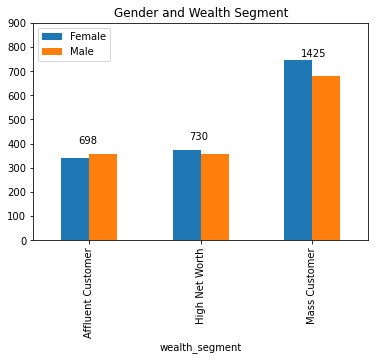

In [219]:
addr_new_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_new_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Gender and Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

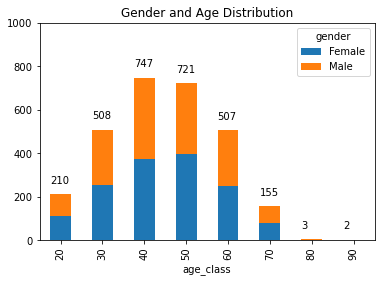

In [173]:
addr_new_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_new_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Gender and Age Distribution')
plt.show()

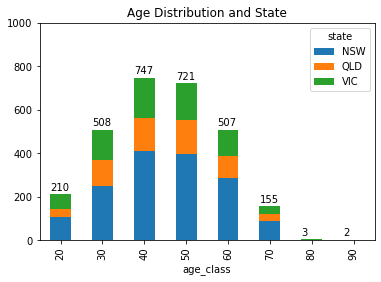

In [220]:
addr_new_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_new_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Age Distribution and State')
plt.show()

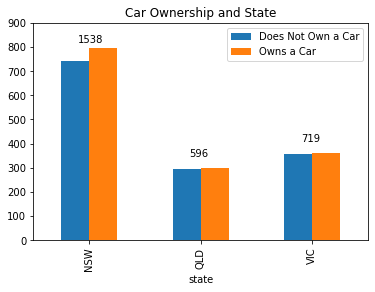

In [221]:
addr_new_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_new_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Car Ownership and State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

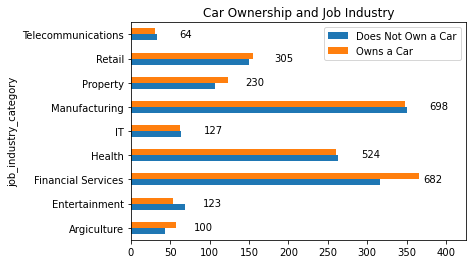

In [222]:
addr_new_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_new_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Car Ownership and Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

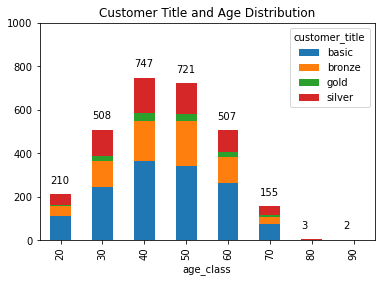

In [174]:
addr_new_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_new_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title and Age Distribution')
plt.show()

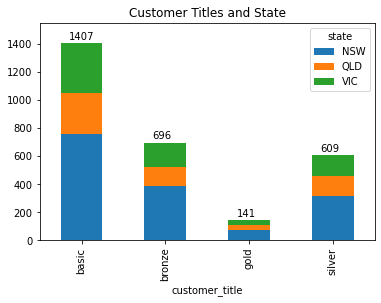

In [179]:
addr_new_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_new_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles and State')
plt.show()

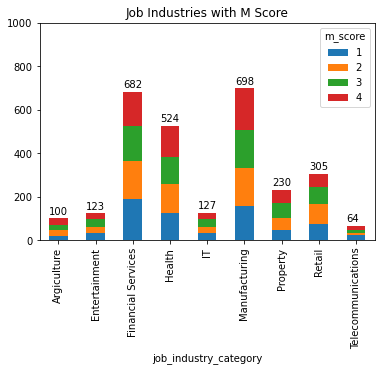

In [180]:
addr_new_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_new_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

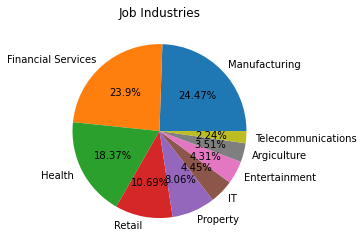

In [223]:
addr_new_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Job Industries')
plt.ylabel('')
plt.show()

In [183]:
count = addr_new_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
count

,count
gender,
Female,69741
Male,69597


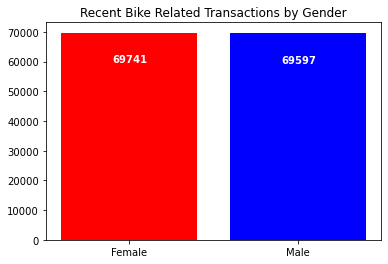

In [184]:
labels = ['Female', 'Male']
plt.bar(labels, count['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Transactions by Gender')
plt.show()

In [186]:
count = addr_new_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
count.rename(columns={'age':'count'},inplace=True)
count['count'] = count['count'].astype(int)
count

,count
customer_title,
basic,1407
bronze,696
gold,141
silver,609


In [187]:
count = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
count.rename(columns={'age':'count'},inplace=True)
count['count'] = count['count'].astype(int)
count

count
state customer_title       
NSW   basic             758
      bronze            387
      gold               75
      silver            318
QLD   basic             291
      bronze            133
      gold               32
      silver            140
VIC   basic             358
      bronze            176
      gold               34
      silver            151

In [188]:
count = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
count.rename(columns={'age':'count'},inplace=True)
count['count'] = count['count'].astype(int)
count

,count
total_score,
3,141
4,308
5,576
6,887
7,1305
8,1724
9,2113
10,2408
11,2596


## **3. Exploring 'New Customer List' Dataset**

In [ ]:
new_customer_lists = pd.read_excel(r"C:\Users\andre\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "NewCustomerList", header=1)

In [190]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.00,1.2500,1.5625,1.328125,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.92,0.9200,1.1500,0.977500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.63,0.6300,0.6300,0.630000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.61,0.7625,0.7625,0.762500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.65,0.6500,0.8125,0.812500,4,4,1.703125


In [191]:
new_customer_lists.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [192]:
new_customer_lists.duplicated().sum()

0

In [193]:
new_customer_lists.shape

(1000, 23)

In [195]:
newcustomerlists_clean = new_customer_lists.dropna()
newcustomerlists_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.00,1.2500,1.5625,1.328125,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.92,0.9200,1.1500,0.977500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.63,0.6300,0.6300,0.630000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.61,0.7625,0.7625,0.762500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.65,0.6500,0.8125,0.812500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.86,0.8600,0.8600,0.860000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.74,0.7400,0.9250,0.786250,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.58,0.7250,0.7250,0.725000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.04,1.3000,1.3000,1.105000,997,997,0.357000


In [197]:
newcustomerlists_clean['age'] = (dt.datetime.now() - newcustomerlists_clean['DOB']) / np.timedelta64(1, 'Y')
newcustomerlists_clean['age_class'] = ((round(newcustomerlists_clean['age'] / 10)) * 10).astype(int)
newcustomerlists_clean.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,1.00,1.2500,1.5625,1.328125,1,1,1.718750,64.848609,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.92,0.9200,1.1500,0.977500,1,1,1.718750,52.155672,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.63,0.6300,0.6300,0.630000,1,1,1.718750,47.720263,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.61,0.7625,0.7625,0.762500,4,4,1.703125,43.301281,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.65,0.6500,0.8125,0.812500,4,4,1.703125,56.654053,60


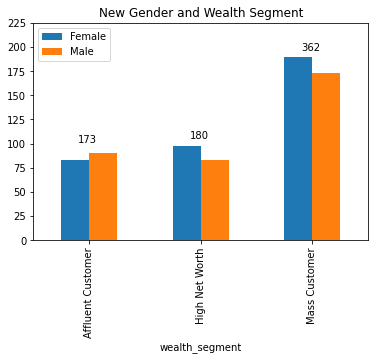

In [213]:
newcustomerlists_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(newcustomerlists_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender and Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

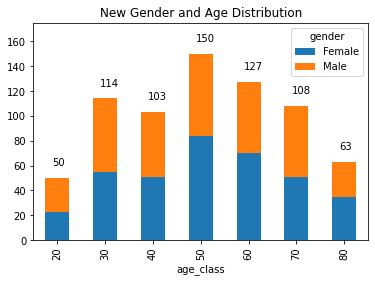

In [214]:
newcustomerlists_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(newcustomerlists_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender and Age Distribution')
plt.show()

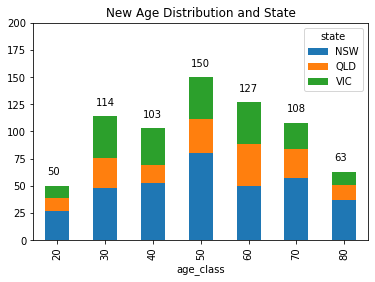

In [218]:
newcustomerlists_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(newcustomerlists_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution and State')
plt.show()

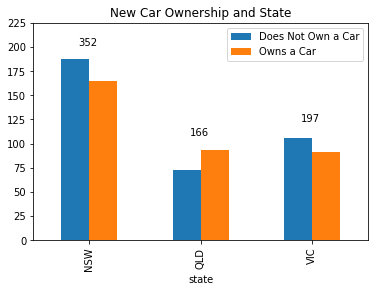

In [215]:
newcustomerlists_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(newcustomerlists_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership and State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

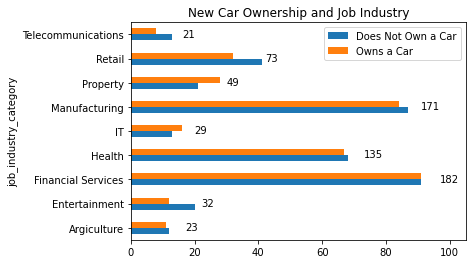

In [216]:
newcustomerlists_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(newcustomerlists_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership and Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

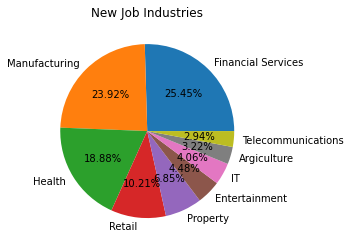

In [198]:
newcustomerlists_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

In [209]:
addr_new_txns['customer_segment'] = addr_new_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_new_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,5,silver,2,...,16.0,41.417554,40,2,6 Meadow Vale Court,2153,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,3,...,15.0,68.322966,70,4,0 Holy Cross Court,4211,QLD,Australia,9,Losing
3,102.0,7,3290.21,4,3,3,433,10,basic,4,...,7.0,60.621234,60,5,17979 Del Mar Point,2448,NSW,Australia,4,Losing
5,16.0,6,2394.94,1,3,2,132,6,silver,6,...,13.0,55.668360,60,7,4 Delaware Trail,2210,NSW,Australia,9,Recent
6,64.0,5,3946.55,3,2,3,323,8,basic,7,...,11.0,46.230794,50,8,49 Londonderry Lane,2650,NSW,Australia,4,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,3497,...,18.0,36.040304,40,3501,16 Carberry Pass,2119,NSW,Australia,11,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,3498,...,5.0,26.539767,30,3502,12 Elgar Place,2155,NSW,Australia,10,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,3499,...,7.0,42.917927,40,3503,8749 Menomonie Point,2122,NSW,Australia,11,Losing
3499,51.0,7,4955.25,3,3,1,331,7,basic,3500,...,17.0,54.825084,50,3504,18072 American Parkway,3195,VIC,Australia,10,Average


In [210]:
top_1000 = addr_new_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
719,11.0,8,4227.84,1,1,1,111,3,gold,720,...,6.0,90.568460,90,724,09 Bartelt Lane,2190,NSW,Australia,8,Platinum
768,5.0,9,5580.57,1,1,1,111,3,gold,769,...,12.0,60.385774,60,773,88 Bay Drive,4305,QLD,Australia,3,Platinum
2434,0.0,9,6874.53,1,1,1,111,3,gold,2435,...,14.0,60.763605,60,2439,75 Westerfield Park,4570,QLD,Australia,1,Platinum
3420,5.0,11,6808.18,1,1,1,111,3,gold,3421,...,18.0,59.416554,60,3425,5 Anhalt Court,3122,VIC,Australia,7,Platinum
144,6.0,8,4888.02,1,1,1,111,3,gold,145,...,4.0,24.823099,20,149,939 Coleman Pass,4509,QLD,Australia,7,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,31.0,5,3226.46,2,2,3,223,7,bronze,874,...,1.0,21.033836,20,878,1 Springview Place,4800,QLD,Australia,5,Average
3095,36.0,5,2799.49,2,2,3,223,7,bronze,3096,...,10.0,48.886564,50,3100,07 Loeprich Junction,2101,NSW,Australia,11,Average
3394,19.0,5,4073.20,2,2,3,223,7,bronze,3395,...,3.0,29.077807,30,3399,2 Monterey Terrace,2120,NSW,Australia,9,Average
1314,27.0,5,2894.17,2,2,3,223,7,bronze,1315,...,12.0,48.897516,50,1319,9 Dawn Court,4128,QLD,Australia,2,Average


In [211]:
writer = pd.ExcelWriter(r"C:\Users\andre\Downloads\KPMG_VI_New_raw_data_update_final.xlsx",
                        engine = 'xlsxwriter')
addr_new_txns.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()